In [1]:
import MIMENet
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
#set path to simulation data
simulation_path = "/mnt/d/data/MIME_data/simData/dmMIME/lowSpecies"

In [25]:
#set training parameters
training_path = simulation_path+'/data/trainingData.txt'
test_path = simulation_path+'/data/testData.txt'
epochs = 20
learning_rate = 0.0001
batch_size = 128
lambda_l1 = 0.00009
hidden_size_factor = 5
bottleneck = 1/5

In [26]:
model, train_history, test_history, mae_train_history, mae_test_history = MIMENet.train(training_path, test_path, epochs, learning_rate, batch_size, lambda_l1, hidden_size_factor, bottleneck)

Device: cuda:0
Epoch: 1/20


100%|██████████| 969/969 [00:07<00:00, 133.31it/s]


Epoch: 2/20


100%|██████████| 969/969 [00:06<00:00, 144.14it/s]


Epoch: 3/20


100%|██████████| 969/969 [00:06<00:00, 145.31it/s]


Epoch: 4/20


100%|██████████| 969/969 [00:06<00:00, 142.98it/s]


Epoch: 5/20


100%|██████████| 969/969 [00:06<00:00, 140.44it/s]


Epoch: 6/20


100%|██████████| 969/969 [00:07<00:00, 130.95it/s]


Epoch: 7/20


100%|██████████| 969/969 [00:06<00:00, 138.88it/s]


Epoch: 8/20


100%|██████████| 969/969 [00:07<00:00, 136.77it/s]


Epoch: 9/20


100%|██████████| 969/969 [00:06<00:00, 139.53it/s]


Epoch: 10/20


100%|██████████| 969/969 [00:07<00:00, 132.63it/s]


Epoch: 11/20


100%|██████████| 969/969 [00:06<00:00, 142.42it/s]


Epoch: 12/20


100%|██████████| 969/969 [00:06<00:00, 144.06it/s]


Epoch: 13/20


100%|██████████| 969/969 [00:07<00:00, 138.03it/s]


Epoch: 14/20


100%|██████████| 969/969 [00:06<00:00, 140.41it/s]


Epoch: 15/20


100%|██████████| 969/969 [00:07<00:00, 136.93it/s]


Epoch: 16/20


100%|██████████| 969/969 [00:06<00:00, 140.99it/s]


Epoch: 17/20


100%|██████████| 969/969 [00:06<00:00, 141.36it/s]


Epoch: 18/20


100%|██████████| 969/969 [00:06<00:00, 141.43it/s]


Epoch: 19/20


100%|██████████| 969/969 [00:06<00:00, 143.27it/s]


Epoch: 20/20


100%|██████████| 969/969 [00:06<00:00, 143.34it/s]


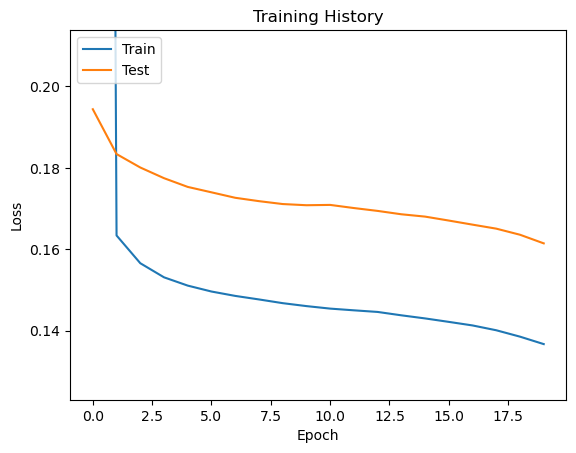

In [27]:
#plot training history
plt.plot(train_history)
plt.plot(test_history)
plt.title("Training History")
plt.ylabel("Loss")
plt.xlabel("Epoch")
#scale y axis to ignore training loss of first epoch
plt.ylim(min(min(train_history),min(test_history))*0.9, max(test_history)*1.1)
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

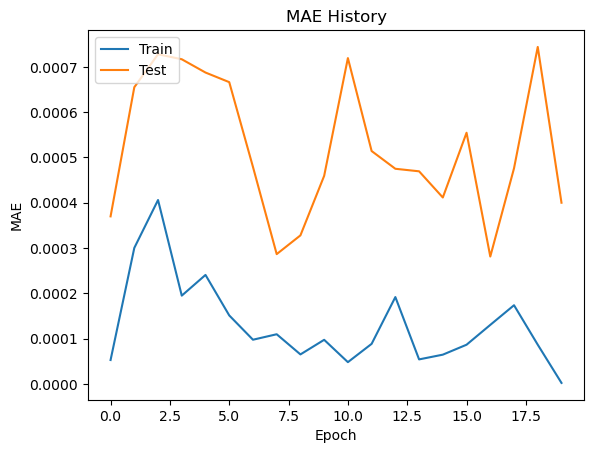

In [28]:
#plot mae history
plt.plot(mae_train_history)
plt.plot(mae_test_history)
plt.title("MAE History")
plt.ylabel("MAE")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

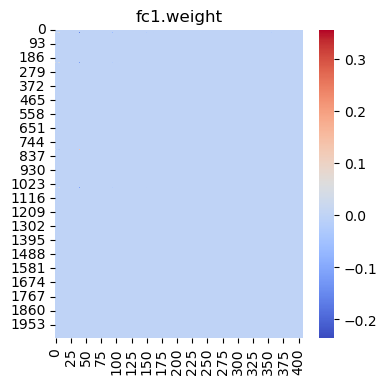

max weight value:  0.35565707
min weight value:  -0.23481338
number of pruned weights:  474676
number of non zero weights:  357644


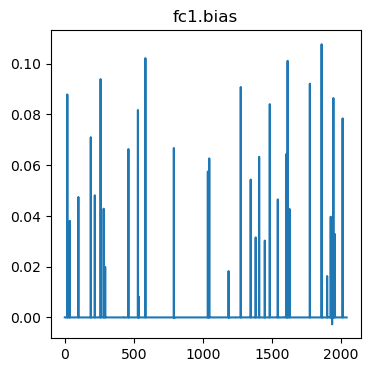

max bias value:  0.10767187
min bias value:  -0.0027005575
number of pruned biases:  1105
number of non zero biases:  935


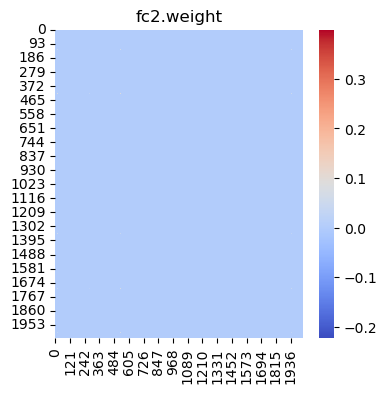

max weight value:  0.39923236
min weight value:  -0.22237007
number of pruned weights:  1991806
number of non zero weights:  2169794


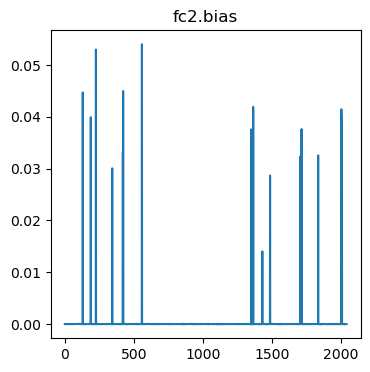

max bias value:  0.053992677
min bias value:  -4.4703687e-05
number of pruned biases:  1125
number of non zero biases:  915


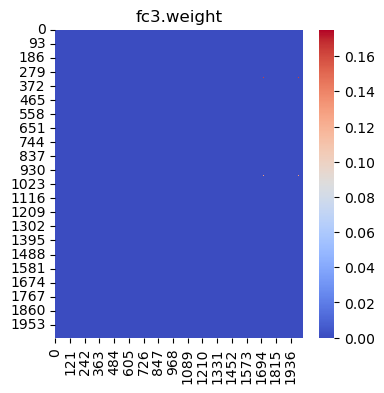

max weight value:  0.17496486
min weight value:  -4.911099e-05
number of pruned weights:  2014376
number of non zero weights:  2147224


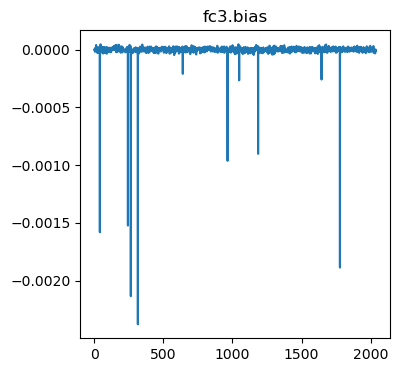

max bias value:  4.662911e-05
min bias value:  -0.0023780065
number of pruned biases:  1128
number of non zero biases:  912


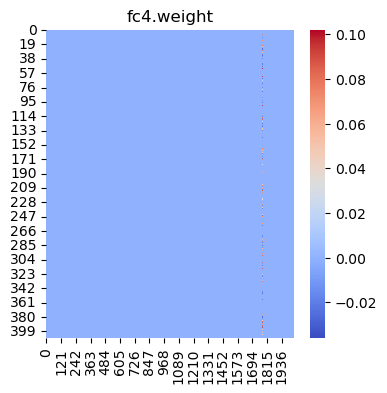

max weight value:  0.1020228
min weight value:  -0.035862293
number of pruned weights:  446948
number of non zero weights:  385372


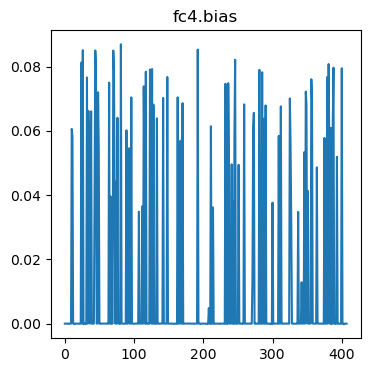

max bias value:  0.08694041
min bias value:  -0.00020809741
number of pruned biases:  155
number of non zero biases:  253


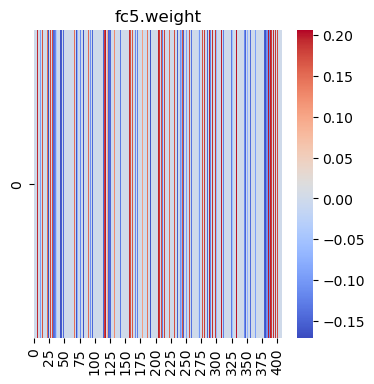

max weight value:  0.20678726
min weight value:  -0.17046873
number of pruned weights:  151
number of non zero weights:  257


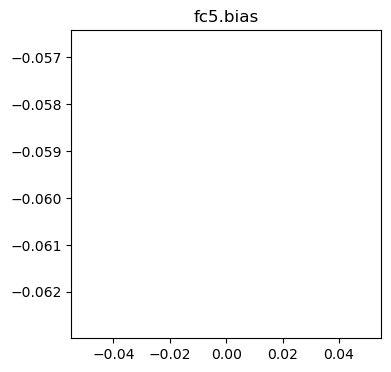

max bias value:  -0.05970585
min bias value:  -0.05970585
number of pruned biases:  0
number of non zero biases:  1


In [29]:
for name, param in model.named_parameters():
    #if weight is not a bias
    if 'bias' not in name:
        #reshape weights to 2d array
        weight = param.data.cpu().numpy().reshape(param.data.cpu().numpy().shape[0], param.data.cpu().numpy().shape[1])
        #plot heatmap of weights
        plt.figure(figsize=(4,4))
        sns.heatmap(weight, cmap='coolwarm')
        plt.title(name)
        plt.show()

        print('max weight value: ', np.max(weight))
        print('min weight value: ', np.min(weight))
        #print('number of weights: ', weight.size)
        print('number of pruned weights: ', np.sum(weight == 0))
        print('number of non zero weights: ', np.sum(weight != 0))

    else:
        bias = param.data.cpu().numpy()
        #plot histogram of biases
        plt.figure(figsize=(4,4))
        sns.lineplot(bias.flatten())
        plt.title(name)
        plt.show()
 
        print('max bias value: ', np.max(bias))
        print('min bias value: ', np.min(bias))
        #print('number of biases: ', bias.size)
        print('number of pruned biases: ', np.sum(bias == 0))
        print('number of non zero biases: ', np.sum(bias != 0))

In [30]:
# read in kd values
kds = np.loadtxt(simulation_path+'/secondFromProt1/prot1/single_kds.txt')

#insert 1 at position 0 and then every 3rd position
kds = np.insert(kds, 0, 1)
kds = np.insert(kds, np.arange(4, len(kds), 3), 1)
kds[0:10]

array([1.      , 0.324353, 0.857232, 0.868419, 1.      , 0.44322 ,
       1.      , 1.      , 1.      , 2.26238 ])

In [31]:
predictions = []
prediction_example = np.zeros(len(kds)+8)
for i in range(8, len(kds)+8):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    current_prediction_example = prediction_example.copy()
    current_prediction_example[i] = 1
    current_prediction_example = torch.from_numpy(current_prediction_example).float()
    current_prediction_example = current_prediction_example.to(device)
    #output binding probability and append list for given protein concentration combination
    with torch.no_grad():
        output = model(current_prediction_example)
        predictions.append(output.item())

predictions[0:10]

[0.606075644493103,
 0.6666055917739868,
 0.6061645150184631,
 0.6094207167625427,
 0.6057337522506714,
 0.6804224848747253,
 0.6877260208129883,
 0.6232333183288574,
 0.6058176159858704,
 0.5996371507644653]

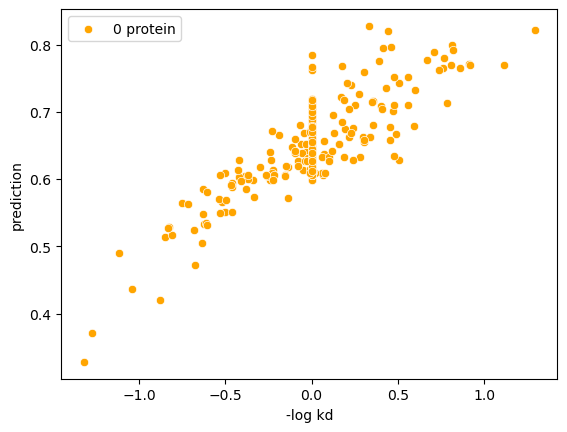

In [32]:
#two plots -log kd vs predictionZeroConc and predictionOneConc
sns.scatterplot(x=-np.log10(kds), y=predictions, label='0 protein', color='orange')
plt.xlabel('-log kd')
plt.ylabel('prediction')
plt.show()